# Getting started with julia language
by [Koba Khitalishvili](http://www.pages.drexel.edu/~kk647/index.html#secondPage)
## Table of contents
- [Download](#Download)
- [Quick Start](#Quick-start)
- [Dataframes, plotting, and file Input/Output](#Data-frames,-plotting,-and-file-Input/Output)
    - [Data frames](#Data-frames)
    - [Plotting data](#Plotting-data)
- [Conclusion](#Conclusion)
- [Resources used](#Resources-used)

## Download 
Download julia from http://julialang.org/

Download julia IDEs:

- Juno from http://junolab.org/

- IJulia notebook from https://github.com/JuliaLang/IJulia.jl
  - To use IJulia you will need the Ipython Notebook which now is called [Jupyter](http://jupyter.readthedocs.org/en/latest/install.html)

Juno is a good IDE for writing and evaluating julia code quickly. IJulia notebook is good for writing tutorials and reports with julia code results embeded in the document. 

Once you've installed everything I recommend opening up the Juno IDE and going through the tutorial.

## Quick start
I execute all julia code below in Juno. I suggest you create a folder on your desktop and make it your working directory where we will be able to write files. First, a couple of basic commands. To evaluate code in Juno you just need to press `Ctrl-D` (its in the Juno tutrial):

In [1]:
VERSION # print julia version number
pwd() # print working directory
homedir() # print the default home directory
cd("C:/Users/TimDz/Desktop/julia-lang") # set working directory to DirectoryPath "C:/Users/TimDz/Desktop/julia-lang"

In [ ]:
3+5 # => 8
5*7 # => 35
3^17 # => 129140163
3^(1+3im) # im stands for imaginary number => -2.964383781426573 - 0.46089998526262876im
log(7) # natural log of 7 => 1.9459101490553132

Interesting that julia has imaginary number built in. Now, variables and functions:

In [1]:
a = cos(pi) + im*sin(pi) # assigning to a variable

-1.0 + 1.2246467991473532e-16im

In [2]:
b = e^(im*pi)

-1.0 + 1.2246467991473532e-16im

In [3]:
a == b # boolean expression. It is an euler identity.

true

Lets see how to define functions. Here is a [chapter on functions](http://julia.readthedocs.org/en/latest/manual/functions/) in julia docs for more info.

In [4]:
plus2(x) = x + 2 # a compact way

function plustwo(x) # traditional function definition
    return x+2
end

plustwo (generic function with 1 method)

In [5]:
plus2(11)

13

In [6]:
plustwo(11)

13

Here is a [julia cheatsheet](http://math.mit.edu/~stevenj/Julia-cheatsheet.pdf) with above and additional information in a concise form. Next, lets write a function that will generate some data which we will write to a csv file, plot, and save the plot. 

## Data frames, plotting, and file Input/Output
So I decided to write a function $f(x)$ that performs the process from the [Collatz conjecture](https://en.wikipedia.org/wiki/Collatz_conjecture). Basically, if x is even divide by $2$, if x is odd multiply by three and add $1$. Repeat the process until you reach one. The Collatz conjecture proposes that regardless of what number you start with you will always reach one. Here it is in explicit form 
$$
f(x) = \begin{cases} x/2, & \mbox{if } x\mbox{ is even} \\ 3x+1, & \mbox{if } x\mbox{ is odd} \end{cases}
$$
The function `collatz(x)` will count the number of iterations it took for the starting number to reach $1$.

In [10]:
function collatz(x)
    # Given a number x
    # - divide by 2 if x is even
    # - multiply by 3 and add 1 if x is odd
    # until x reaches 1
    count = 0
    while x != 1
        if x % 2 == 0
            x = x/2
            count += 1
        else
            x = 3*x + 1
            count += 1
        end
    end
    return count
end

collatz(2)

1

In [11]:
collatz(3)

7

### Data frames
Now, lets create a data frame with the number of steps needed to reach 1 for each number from 1 to 1000. We will use the [`DataFrames` package](https://github.com/JuliaStats/DataFrames.jl) because the base julia library does not have data frames.

In [13]:
# Pkg.add("DataFrames")
using DataFrames

# Before populating the dataframe with collatz data lets see how to create a dataframe
df = DataFrame(Col1 = 1:10, Col2 = ["a","b","c","d","e","f","a","b","c","d"])

# Lets use collatz data
df = DataFrame(Number = 1:1000, NumofSteps = map(collatz,1:1000))
head(df)

,Number,NumofSteps
1,1,0
2,2,1
3,3,7
4,4,2
5,5,5
6,6,8


`map()` applies `collatz()` function to every number in the `1:1000` array which is an array of numbers `[1,2,3,...,1000]`. In this instance `map()` returns an array of numbers that went went through `collatz()` function. 


In [14]:
# To get descriptive statistics 
describe(df)

Number
Min      1.0
1st Qu.  250.75
Median   500.5
Mean     500.5
3rd Qu.  750.25
Max      1000.0
NAs      0
NA%      0.0%

NumofSteps
Min      0.0
1st Qu.  26.0
Median   43.0
Mean     59.542
3rd Qu.  99.0
Max      178.0
NAs      0
NA%      0.0%



Before we save it lets categorize the points based on whether the original number is even or odd.

In [15]:
df = hcat(df, map(x -> if x % 2 == 0 "even" else "odd" end, 1:1000)) # create new evenodd column
rename!(df, :x1, :evenodd) #rename it to evenodd
head(df)

,Number,NumofSteps,evenodd
1,1,0,odd
2,2,1,even
3,3,7,odd
4,4,2,even
5,5,5,odd
6,6,8,even


`hcat(df, column(s))` horizontally concatenates data frames. I use the `map()` function with an anonymous function `x -> if x % 2 == 0 "even" else "odd" end` which checks for divisibility by two to create a column with "even" and "odd" as entries. Finally, I rename the new column "evenodd". Lets save it:

In [16]:
# To save the data frame in the working directory (make sure to set the wd as described in the beginning of the tutorial)
writetable("collatz.csv", df)

### Plotting data
To plot the data we will use the [`Gadfly`](https://github.com/dcjones/Gadfly.jl) package. `Cairo` is needed to be able to save plots as PDFs and PNG. First, I will do a simple plot.

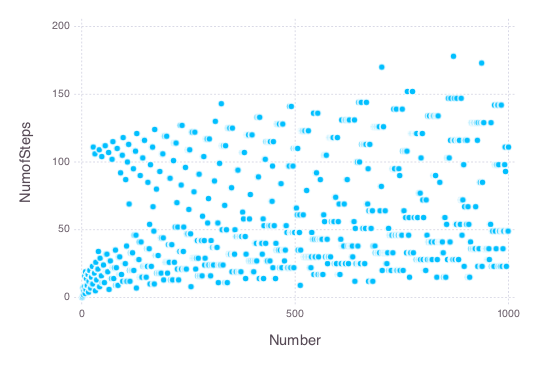

In [18]:
# Pkg.add("Gadfly")
# Pkg.add("Cairo")
# Pkg.add("Compose")
# Pkg.update()
using Gadfly, Cairo

plot(df,x="Number", y="NumofSteps", Geom.point)

Looks pretty. You should be able to zoom in/out. Lets color the points based on whether the original number is even or odd. I will assign the plot to a variable and save it.

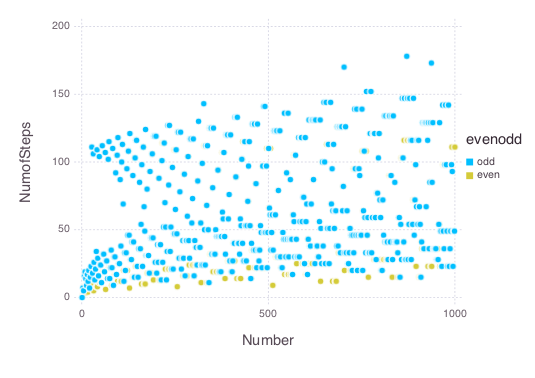

In [19]:
a = plot(df,x="Number", y="NumofSteps", color = "evenodd", Geom.point) # assign plot to variable

It looks like odd numbers overlay the even numbers points. Let's plot even and odd numbers side by side.

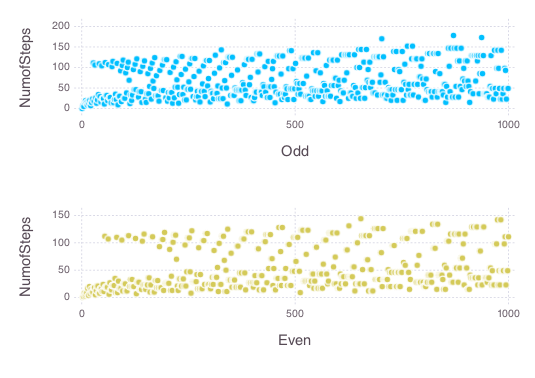

In [39]:
a = plot(df[df[:evenodd] .== "odd",:],
         x="Number", y="NumofSteps", 
         Geom.point,
         Guide.xlabel("Odd"))

b = plot(df[df[:evenodd] .== "even",:],
         x="Number", y="NumofSteps", 
         Geom.point,  
Guide.xlabel("Even"),
         Theme(default_color=colorant"#d4ca59"))

vstack(a,b)

Even numbers up to 1000 require fewer steps to reach one through the Collatz procedure than odd numbers. We can save this plot.

In [41]:
# Save the plot in the working directory
draw(PNG("collatz-plot.png", 8inch, 10inch), vstack(a,b))

## Conclusion
Julia is a comfortable language to work with and many say it is the future of scientific computing. It may very well be true. One of the main reasons is Julia's JIT compiler which makes Julia almost as fast and sometimes faster than C.  At this point, I find Julia not as good as R simply because R is more mature and has a bigger commmunity. R aslo has better documentation and more questions on Stackoverflow. There  are $109419$ questions with an R tag in contrast to $1251$ questions with julia-lang tag as of 10/12/2015 and $1631$ as of 3/7/2016. 

Julia is up and coming and given enough time it could create competition for R. Unlikely that Julia is going to be a competitor in the industry against Python, SAS and R, but in academia it is a different story. 

## Resources used
- [Julia manual](http://docs.julialang.org/en/release-0.4/)
- [IJulia](https://github.com/JuliaLang/IJulia.jl)
- [DataFrames docs](http://dataframesjl.readthedocs.org/en/latest/)
- [Gadfly docs](https://github.com/dcjones/Gadfly.jl)